In [9]:
import pandas as pd
import numpy as np

# Load dataset
df = pd.read_csv("../data/loan_approval_dataset.csv")

# Basic shape and preview
print("Shape:", df.shape)
df.head()

Shape: (4269, 13)


,loan_id,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,loan_status
0,1,2,Graduate,No,9600000,29900000,12,778,2400000,17600000,22700000,8000000,Approved
1,2,0,Not Graduate,Yes,4100000,12200000,8,417,2700000,2200000,8800000,3300000,Rejected
2,3,3,Graduate,No,9100000,29700000,20,506,7100000,4500000,33300000,12800000,Rejected
3,4,3,Graduate,No,8200000,30700000,8,467,18200000,3300000,23300000,7900000,Rejected
4,5,5,Not Graduate,Yes,9800000,24200000,20,382,12400000,8200000,29400000,5000000,Rejected


In [13]:
# Check column names and types
df.info()

# Check target variable distribution
print(df['loan_status'].value_counts(normalize=True))

# Describe numerical features
# df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4269 entries, 0 to 4268
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   loan_id                   4269 non-null   int64 
 1   no_of_dependents          4269 non-null   int64 
 2   education                 4269 non-null   object
 3   self_employed             4269 non-null   object
 4   income_annum              4269 non-null   int64 
 5   loan_amount               4269 non-null   int64 
 6   loan_term                 4269 non-null   int64 
 7   cibil_score               4269 non-null   int64 
 8   residential_assets_value  4269 non-null   int64 
 9   commercial_assets_value   4269 non-null   int64 
 10  luxury_assets_value       4269 non-null   int64 
 11  bank_asset_value          4269 non-null   int64 
 12  loan_status               4269 non-null   object
dtypes: int64(10), object(3)
memory usage: 433.7+ KB
loan_status
Approved    0.6221

In [ ]:
# Check for missing values
df.isnull().sum()

# Optional: visualize missing data
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10,6))
sns.heatmap(df.isnull(), cbar=False, cmap='viridis')
plt.title("Missing Values Heatmap")
plt.show()


In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Loan status counts
sns.countplot(data=df, x='loan_status')
plt.title("Loan Approval Distribution")
plt.show()

# Education vs Loan Status
sns.countplot(data=df, x='education', hue='loan_status')
plt.title("Loan Approval by Education")
plt.show()

# Self Employed vs Loan Status
sns.countplot(data=df, x='self_employed', hue='loan_status')
plt.title("Loan Approval by Employment Type")
plt.show()


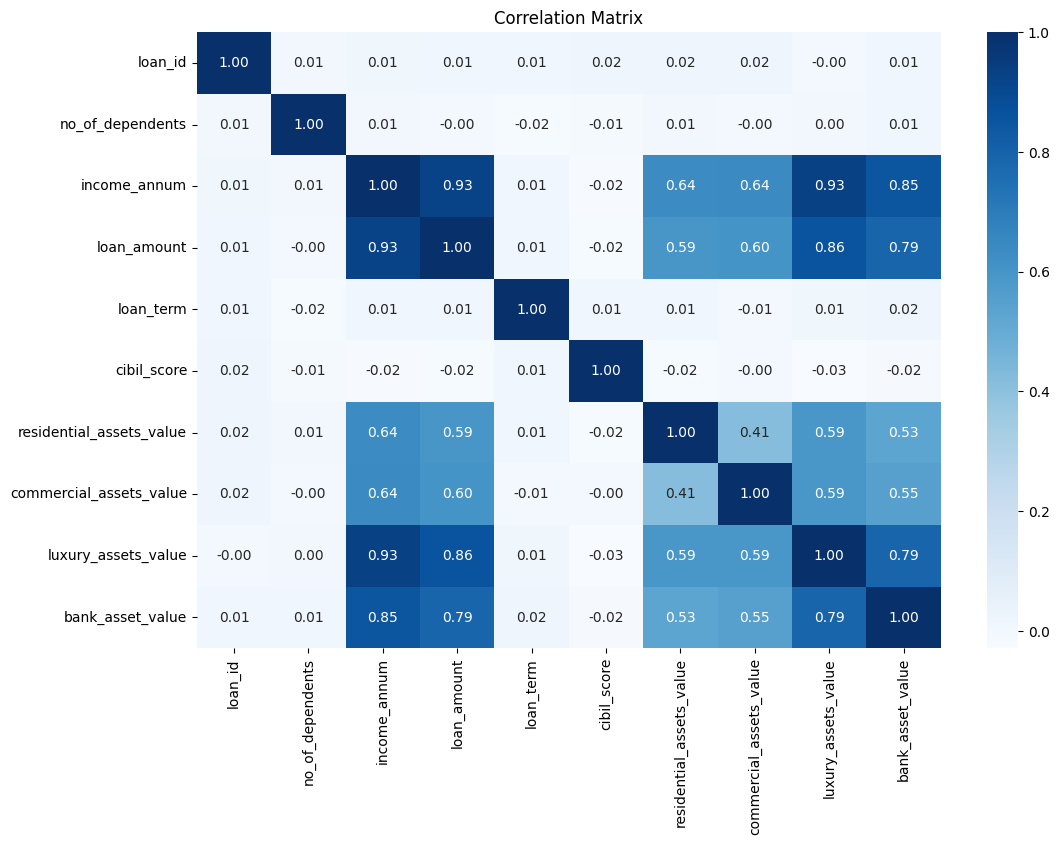

In [25]:
plt.figure(figsize=(12,8))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap="Blues", fmt=".2f")
plt.title("Correlation Matrix")
plt.show()


In [31]:
# convert categorical variables to numerical
df_encoded = df.copy()

# strip whitespace from column names
df_encoded['education'] = df_encoded['education'].str.strip()
df_encoded['self_employed'] = df_encoded['self_employed'].str.strip()
df_encoded['loan_status'] = df_encoded['loan_status'].str.strip()
# Binary encoding
df_encoded['education'] = df_encoded['education'].map({'Graduate': 1, 'Not Graduate': 0})
df_encoded['self_employed'] = df_encoded['self_employed'].map({'Yes': 1, 'No': 0})
df_encoded['loan_status'] = df_encoded['loan_status'].map({'Approved': 1, 'Rejected': 0})

# drop irrelevant columns
df_encoded.drop('loan_id', axis=1, inplace=True)

# split features and target
x = df_encoded.drop('loan_status', axis=1)
y = df_encoded['loan_status']

# split into train and test sets
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)
# print("Train set:", x_train.shape)
# print("Test set:", x_test.shape)

# # scale features
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test) 
# check scaled data
print("Scaled Train Data:", x_train_scaled[:5])
print("Scaled Test Data:", x_test_scaled[:5])


Scaled Train Data: [[ 1.51250774 -1.00263891 -1.01504731  1.00950021  1.62477248 -0.86000338
  -0.18740061 -0.25538429  2.04678575  0.07808278  1.16041374]
 [-1.43500078 -1.00263891  0.98517575  1.61417128  2.07712843  0.1888936
   0.63739678  2.49569299  1.22311091  2.49843196  0.88201987]
 [-0.84549907  0.99736803 -1.01504731 -1.51589075 -1.35415691 -0.51037106
   0.47476068 -0.80559975 -0.8818359  -1.33923881 -1.31419838]
 [-0.25599737  0.99736803  0.98517575 -0.05756639 -0.22878359  1.23779058
   0.8929678   0.11142601 -0.37847906  0.14349763  0.69642396]
 [ 1.51250774  0.99736803  0.98517575 -0.73337524 -0.44944502  0.1888936
  -0.92507151  0.1572773  -0.56151791 -0.85952996 -0.91207391]]
Scaled Test Data: [[ 1.51250774  0.99736803 -1.01504731  0.12027804  0.49939915  1.58742291
  -1.02962329 -0.14839795  1.15447134  0.05627784  0.72735662]
 [-0.25599737  0.99736803 -1.01504731  0.29812247 -0.12948594 -0.51037106
  -0.00733921 -0.42350568  1.04007205  0.28522978  0.54176071]
 [ 0.